# 按季度统计数据中的过敏性疾病的人数，并作图

## 从excel中读取原始数据

In [1]:
import numpy as np
import pandas as pd # 导入pandas库
file_directory = "2018年过敏统计信息表 A题附件.xls" #原始数据的文件名
data = pd.read_excel(file_directory,sep='\t',parse_dates=['检测日期']) #读取数据，并保存到data中

## 观察分析数据特点，找到解决问题的思路

In [2]:
# 打印，观察读入的数据
data.head(4)

,检测日期,性别,年龄,科室,树组合(柳树/杨树/榆树),普通豚草,艾蒿,尘螨组合(屋尘螨/粉尘螨),屋尘,猫毛,...,霉菌组合,律草,鸡蛋白,牛奶,花生,黄豆,海鱼组合1(鳕鱼/龙虾/扇贝),虾,蟹,Unnamed: 21
0,2013-10-16,女,52,呼吸科,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,NaN
1,2013-10-16,女,52,皮肤科,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,NaN
2,2013-10-23,男,37,皮肤科,0(-),0(-),0(-),2(+),0(-),0(-),...,0(-),0(-),0(-),0(-),0(-),0(-),0(-),0(-),0(-),NaN
3,2013-10-23,女,44,皮肤科,0(-),0(-),0(-),1(±),0(-),0(-),...,1(±),0(-),0(-),0(-),0(-),0(-),0(-),0(-),3(2+),NaN


In [3]:
# 输出数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 22 columns):
检测日期               2284 non-null datetime64[ns]
性别                 2284 non-null object
年龄                 2284 non-null int64
科室                 2284 non-null object
树组合(柳树/杨树/榆树)      2284 non-null object
普通豚草               2284 non-null object
艾蒿                 2284 non-null object
尘螨组合(屋尘螨/粉尘螨)      2284 non-null object
屋尘                 2284 non-null object
猫毛                 2284 non-null object
狗上皮                2283 non-null object
蟑螂                 2278 non-null object
霉菌组合               2284 non-null object
律草                 2284 non-null object
鸡蛋白                2284 non-null object
牛奶                 2284 non-null object
花生                 2284 non-null object
黄豆                 2283 non-null object
海鱼组合1(鳕鱼/龙虾/扇贝)    2283 non-null object
虾                  2280 non-null object
蟹                  2276 non-null object
Unnamed: 21        4 non-null object
dtypes: d

In [4]:
# 分析数据每一项（每一列）的数据种类种类

# 定义一个找每列唯一值的函数，并统计唯一值的数量，另外把数量少于30的打印输出
def statistics_category(header):
    data_A=data[header].unique() # 找到每列唯一值的函数
    print('%s--种类数量:'%(header),data_A.size) # 打印此列类型的数量
    if data_A.size<30:          # 把种类数量少于30的打印输出
        print('%s:'%(header),data_A) 
        
l=len(list(data))
for i in range(l):
    print('第%d项'%(i+1))
    statistics_category(list(data)[i])

第1项
检测日期--种类数量: 512
第2项
性别--种类数量: 3
性别: ['女' '男' '未知']
第3项
年龄--种类数量: 96
第4项
科室--种类数量: 26
科室: ['呼吸科' '皮肤科' '儿科' '消化科' '中医' '普内科' '耳鼻喉科' '泌尿科' '体检中心' '中医科' '神经科' '肿瘤科'
 '普外科' '眼科' '体检科' '血液科' '肾内科' '内分泌科' '心内科' '康复医学科' '口腔科' '妇科' '灰甲趾' '骨科'
 '耳专病门诊' '推拿科']
第5项
树组合(柳树/杨树/榆树)--种类数量: 9
树组合(柳树/杨树/榆树): ['0' '0(-)' '3' '1' '2' '5' '1(±)' '2(+)' '3(2+)']
第6项
普通豚草--种类数量: 10
普通豚草: ['0' '0(-)' '1' '2' '1(±)' '6(5+)' '3(2+)' '2(+)' '5(4+)' '4(3+)']
第7项
艾蒿--种类数量: 12
艾蒿: ['0' '0(-)' '1' '5' '2' '3' '4' '1(±)' '3(2+)' '5(4+)' '2(+)' '4(3+)']
第8项
尘螨组合(屋尘螨/粉尘螨)--种类数量: 14
尘螨组合(屋尘螨/粉尘螨): ['0' '2(+)' '1(±)' '0(-)' '3(2+)' '1' '4' '4(3+)' '3' '5' '2' '0.00'
 '5(4+)' '6(5+)']
第9项
屋尘--种类数量: 10
屋尘: ['0' '0(-)' '2' '1(±)' '2(+)' '1' '4' '3' '4(3+)' '5(4+)']
第10项
猫毛--种类数量: 10
猫毛: ['0' '0(-)' '1' '5(4+)' '2' '3(2+)' '1(±)' '2(+)' '4(3+)' '6(5+)']
第11项
狗上皮--种类数量: 12
狗上皮: ['0' '0(-)' '2(+)' '1(±)' '0.00' '2' '1' '3(2+)' '4(3+)' '5(4+)' '6(5+)'
 nan]
第12项
蟑螂--种类数量: 11
蟑螂: ['1' '0(-)' '1(±)' '0' '0.00' '2' '3' '3(2+)

# 清洗数据

In [5]:
# 根据观察的信息，清洗数据
# 清除无用的列
data.drop(['Unnamed: 21'], axis=1,inplace=True) #删除Unnamed: 21列（即最后一列）

In [6]:
# 清除无用的列
data_drop=data.dropna(axis=0, how='any') # Remove missing values. 删除有过敏原有空值的那一行

print(list(data)) # 标题 显示验证最后一列Unnamed被删除
print('清洗前数据行数：',len(data)) # 数据行数（2284）
print('数据清洗后长度：',len(data_drop)) # 数据长度（2267）
len(data)- len(data_drop)# 去掉无用的数据的行数（17）
(len(data)- len(data_drop))/len(data)*100 # (处理掉的数据占0.744%)

['检测日期', '性别', '年龄', '科室', '树组合(柳树/杨树/榆树)', '普通豚草', '艾蒿', '尘螨组合(屋尘螨/粉尘螨)', '屋尘', '猫毛', '狗上皮', '蟑螂', '霉菌组合', '律草', '鸡蛋白', '牛奶', '花生', '黄豆', '海鱼组合1(鳕鱼/龙虾/扇贝)', '虾', '蟹']
清洗前数据行数： 2284
数据清洗后长度： 2267


0.7443082311733801

## 数据类型数字化

In [7]:
# 定义一个等级替换函数
# 过敏分级：0-6（共7级）
# [  0      1      2      3       4       5       6]
# ['0(-)' '1(±)'  '2(+)' '3(2+)' '4(3+)' '5(4+)' '6(5+)']

def Allergic_classification_str(header):
    data_drop[header] = data_drop.loc[:,header].replace(['0(-)','1(±)','2(+)','3(2+)','4(3+)','5(4+)','6(5+)'],[0,1,2,3,4,5,6]) 

l=range(len(list(data_drop)))
ll=l[4:] #从第四列开始到最后一列都是过敏原
i=4
for i in ll:
#     print(list(data_drop)[i]) #打印出要替换的列
    Allergic_classification_str(list(data_drop)[i]) #调用等级替换函数，把字符替换成相应等级的数字

In [9]:
#打印出清洗和分级处理后的数据
data_drop.head(5)

,检测日期,性别,年龄,科室,树组合(柳树/杨树/榆树),普通豚草,艾蒿,尘螨组合(屋尘螨/粉尘螨),屋尘,猫毛,...,蟑螂,霉菌组合,律草,鸡蛋白,牛奶,花生,黄豆,海鱼组合1(鳕鱼/龙虾/扇贝),虾,蟹
0,2013-10-16,女,52,呼吸科,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2013-10-16,女,52,皮肤科,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,2013-10-23,男,37,皮肤科,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-10-23,女,44,皮肤科,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,3
4,2013-10-23,女,61,皮肤科,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 添加标签（表示有无过敏性疾病）

In [10]:
data_label = pd.DataFrame({'label':np.zeros(data_drop.shape[0])}) 
data_label.index = data_drop.index 

In [11]:
# 判读患者是否为过敏性疾病：过敏源全为0则是非过敏性疾病，其他情况都为过敏性疾病
l=range(len(list(data_drop)))
ll=l[4:]
data_label = pd.DataFrame({'label':np.zeros(data_drop.shape[0])}) 
data_label.index = data_drop.index  #要设置为index，因为中间有drop掉的东西

for j in data_drop.index:# j要设置为index，因为中间有drop掉的东西
    a = 0
    i=4
    for i in ll:
        f=float(data_drop[list(data_drop)[i]][j])
        if f==0.0:
            a=a+1           
    if a<17:
        data_label['label'][j]=1 #没达到全部为0（即a<17））说明有过敏性疾病

print('数据行数：',len(data_drop)) # 数据行数（2284）

数据行数： 2267


In [12]:
data_drop_label = data_drop.join(data_label.label)#在数据的最后添加一行label 0代表没有病，1代表有病
data_drop_label.head(5)

,检测日期,性别,年龄,科室,树组合(柳树/杨树/榆树),普通豚草,艾蒿,尘螨组合(屋尘螨/粉尘螨),屋尘,猫毛,...,霉菌组合,律草,鸡蛋白,牛奶,花生,黄豆,海鱼组合1(鳕鱼/龙虾/扇贝),虾,蟹,label
0,2013-10-16,女,52,呼吸科,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
1,2013-10-16,女,52,皮肤科,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
2,2013-10-23,男,37,皮肤科,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,2013-10-23,女,44,皮肤科,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,3,1.0
4,2013-10-23,女,61,皮肤科,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


## 过敏性疾病按每年的季节分类统计

In [13]:
# 按时间提取数据
# 设置一个dataframe格式的数据，以便存放季节标签
season_label = pd.DataFrame({'season':np.zeros(data_drop.shape[0])}) 

# 把数据按每年的季节分为20个标签
for i in data_drop.index:
    if (data_drop.检测日期[i].month>=3) & (data_drop.检测日期[i].month<6):
        season_label['season'][i]=str(data_drop.检测日期[i].year)+'spring'
    if (data_drop.检测日期[i].month>=6) & (data_drop.检测日期[i].month<9):
        season_label['season'][i]=str(data_drop.检测日期[i].year)+'summer'
    if (data_drop.检测日期[i].month>=9) & (data_drop.检测日期[i].month<12):
        season_label['season'][i]=str(data_drop.检测日期[i].year)+'autumn'
    if (data_drop.检测日期[i].month>=12) | (data_drop.检测日期[i].month<3):
        season_label['season'][i]=str(data_drop.检测日期[i].year)+'winter'

data_s_t=data_drop_label.join(season_label.season)#在数据的最后添加一行season 代表一年四季
# 到现在data_s_t数据中即有label标签页有代表季节标签

## 统计各个标签的数量

In [14]:
data_allergy_s = data_s_t[data_s_t.label.isin([1])] #提取出有过敏性疾病的数据
# 建立了季度与疾病就诊人数的联系

S =['2013spring','2014spring','2015spring','2016spring','2017spring',
    '2013summer','2014summer','2015summer','2016summer','2017summer',
    '2013autumn','2014autumn','2015autumn','2016autumn','2017autumn',
    '2013winter','2014winter','2015winter','2016winter','2017winter']
S_count=np.zeros(len(S)) #计数


for j in data_allergy_s.index:
    for i in range(len(S)):
        if data_allergy_s.season[j]==S[i]:
            S_count[i] = S_count[i]+1

## 画出直方图

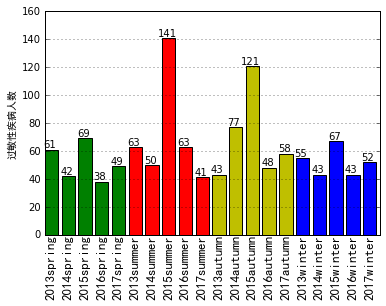

In [19]:
# 画出按季节分布的图
import matplotlib.pyplot as plt
%matplotlib inline
# plt.bar(range(len(S_count)),S_count,width=1.5,color = 'c',label = 'm=2')
plt.bar([0,1,2,3,4],[S_count[0],S_count[1],S_count[2],S_count[3],S_count[4]],color = 'g',label = 'm=2')
plt.bar([5,6,7,8,9],[S_count[5],S_count[6],S_count[7],S_count[8],S_count[9]],color = 'r',label = 'm=2')
plt.bar([10,11,12,13,14],[S_count[10],S_count[11],S_count[12],S_count[13],S_count[14]],color = 'y',label = 'm=2')
plt.bar([15,16,17,18,19],[S_count[15],S_count[16],S_count[17],S_count[18],S_count[19]],color = 'b',label = 'm=2')
for x,y,z in zip(range(len(S_count)),S_count,S):
    plt.text(x+0.3,y,'%d'%y,ha='center',va='bottom')
    t=plt.text(x+0.4,-46,'%s'%z,ha='center',va='bottom',fontproperties ='SimHei', fontsize=13)
    t.set_rotation(90) 
# plt.xlabel('季节',fontproperties ='SimHei', fontsize=15)  
plt.ylabel('过敏性疾病人数',fontproperties ='SimHei', fontsize=20)
plt.xticks([])
plt.grid()
plt.figure(figsize=(60,20))

In [16]:
# 把经过加标签和提取后的数据保存为excel
# data_allergy_sl保存到data_label_l_s.xlsx里
writer = pd.ExcelWriter('data_label_l_s.xlsx')
data_allergy_s.to_excel(writer,'Sheet1')
writer.save()